<a href="https://colab.research.google.com/github/nissrinayy/deeplearning/blob/main/Week6/LSTM_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LSTM Model with Tensorflow 🧑‍🎤👩‍🚀: DeteksiSarkasme.json**

In [13]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


##Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import keras_tuner as kt

##Loading and Preprocessing the Data

In [2]:
data = pd.read_json('/content/Cleaned_DeteksiSarkasme.json')


In [3]:
# Display the first few rows of the dataset
print(data.head())


                                        article_link  \
0  https://www.huffingtonpost.com/entry/versace-b...   
1  https://www.huffingtonpost.com/entry/roseanne-...   
2  https://local.theonion.com/mom-starting-to-fea...   
3  https://politics.theonion.com/boehner-just-wan...   
4  https://www.huffingtonpost.com/entry/jk-rowlin...   

                                            headline  is_sarcastic  
0  former versace store clerk sues over secret 'b...             0  
1  the 'roseanne' revival catches up to our thorn...             0  
2  mom starting to fear son's web series closest ...             1  
3  boehner just wants wife to listen, not come up...             1  
4  j.k. rowling wishes snape happy birthday in th...             0  


In [4]:
# Tokenize the text data (headlines)
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(data['headline'])


In [5]:
# Convert the headlines into sequences of integers
X = tokenizer.texts_to_sequences(data['headline'])


In [6]:
# Pad sequences to ensure consistent input length
X_pad = pad_sequences(X, maxlen=100)


In [7]:
# Target variable (sarcasm label)
y = data['is_sarcastic'].values


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

##Building the RNN Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))  # Embedding layer
    model.add(LSTM(128, return_sequences=False))  # LSTM layer
    model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
model = create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##Training the Model

In [11]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7168 - loss: 0.5169 - val_accuracy: 0.8495 - val_loss: 0.3421
Epoch 2/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8918 - loss: 0.2664 - val_accuracy: 0.8562 - val_loss: 0.3344
Epoch 3/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9318 - loss: 0.1806 - val_accuracy: 0.8517 - val_loss: 0.3611
Epoch 4/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9495 - loss: 0.1360 - val_accuracy: 0.8486 - val_loss: 0.4519
Epoch 5/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9654 - loss: 0.0967 - val_accuracy: 0.8403 - val_loss: 0.4844


##Visualizing Training Results (Accuracy and Loss)

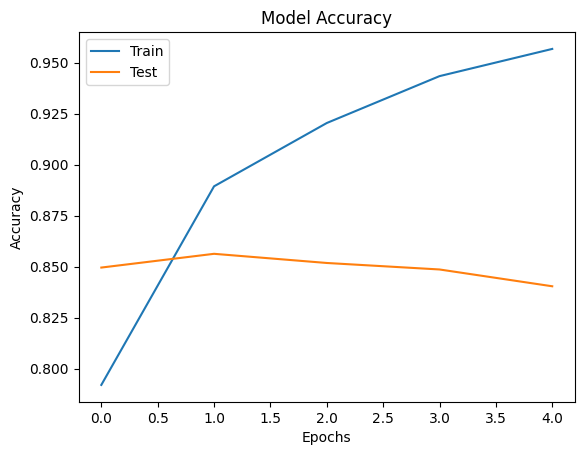

In [15]:
# Plot training & validation accuracy and loss values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

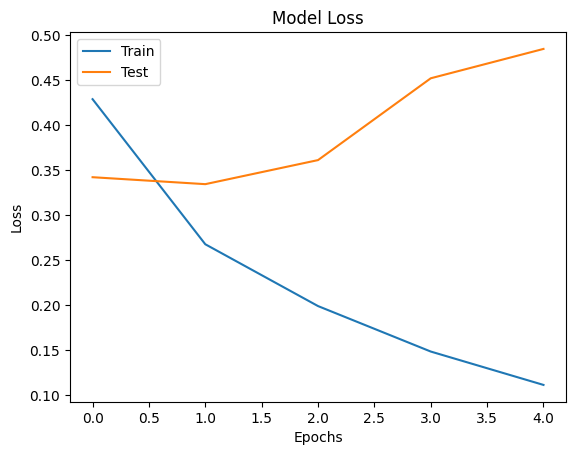

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Model Evaluation

In [17]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict(X_test))


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [18]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

Accuracy: 0.8403219767877199
Precision: 0.8355056179775281
Recall: 0.7924126172208014
F1 Score: 0.8133887551957996
AUC-ROC: 0.9142733789980843


##Hyperparameter Tuning with Keras Tuner

In [19]:
# Hyperparameter Tuning with Keras Tuner
def build_model_hp(hp):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
# Initialize the tuner
tuner = kt.Hyperband(build_model_hp, objective='val_accuracy', max_epochs=5, factor=3, directory='my_dir', project_name='sarcasm_detection')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Trial 10 Complete [00h 00m 45s]
val_accuracy: 0.8607262969017029

Best val_accuracy So Far: 0.8607262969017029
Total elapsed time: 00h 04m 55s


In [22]:
# Get the best model and evaluate
best_model = tuner.get_best_models(num_models=1)[0]
best_model.evaluate(X_test, y_test)

167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8634 - loss: 0.3325


[0.3359052240848541, 0.8607262969017029]